# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1.Importing Dataframe

In [2]:
# Setting Variables
path = r'C:\Users\Saikat Halder\Documents\CareerFoundry\Data Immersion\Achievement 6\World Happiness Report Analysis 03202024'

# Importing Merged and Cleaned Dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','WHS_merged_clean_2.pkl'))

## Verifying Dataframes

In [3]:
df_merged.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [4]:
df_merged.shape

(1367, 10)

In [5]:
%matplotlib inline

# 2. Data Cleaning

## Missing Values 

In [7]:
# Check for missing values

df_merged.isnull().sum()

# No missing values to handle

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

## Duplicate Check 

In [11]:
dups = df_merged.duplicated()
dups.shape
# No Dups

(1367,)

## Extreme Value Check 

###  happiness_score

C:\Users\Saikat Halder\AppData\Local\Temp\ipykernel_21512\2455075860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['happiness_score'], bins=25) # Shows extreme values
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='happiness_score', ylabel='Density'>

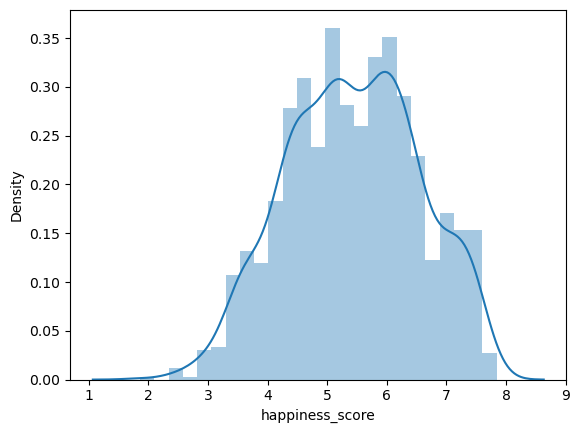

In [12]:
sns.distplot(df_merged['happiness_score'], bins=25) # Shows extreme values

#### There are no outliers

#### Check the mean, median, max

In [22]:
happiness_score_mean = df_merged['happiness_score'].mean()
happiness_score_max = df_merged['happiness_score'].max()
happiness_score_median = df_merged['happiness_score'].median()

print('happiness_score_mean =', happiness_score_mean,'\n'
      'happiness_score_max =', happiness_score_max,'\n'
      'happiness_score_median =', happiness_score_median)

happiness_score_mean = 5.441086100337235 
happiness_score_max = 7.842 
happiness_score_median = 5.44


### gdp_per_capita

C:\Users\Saikat Halder\AppData\Local\Temp\ipykernel_21512\2809109992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['gdp_per_capita'], bins=25) # Shows extreme values
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

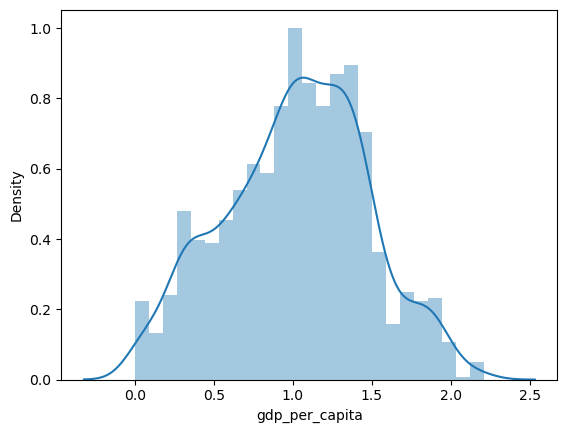

In [23]:
sns.distplot(df_merged['gdp_per_capita'], bins=25) # Shows extreme values

#### Check the mean, median, max

In [24]:
gdp_per_capita_mean = df_merged['gdp_per_capita'].mean()
gdp_per_capita_max = df_merged['gdp_per_capita'].max()
gdp_per_capita_median = df_merged['gdp_per_capita'].median()

print('gdp_per_capita_mean =', gdp_per_capita_mean,'\n'
      'gdp_per_capita_max =', gdp_per_capita_max,'\n'
      'gdp_per_capita_median =', gdp_per_capita_median)

gdp_per_capita_mean = 1.019422176543526 
gdp_per_capita_max = 2.209 
gdp_per_capita_median = 1.043


# 3. Data Prep For Regression Analysis 

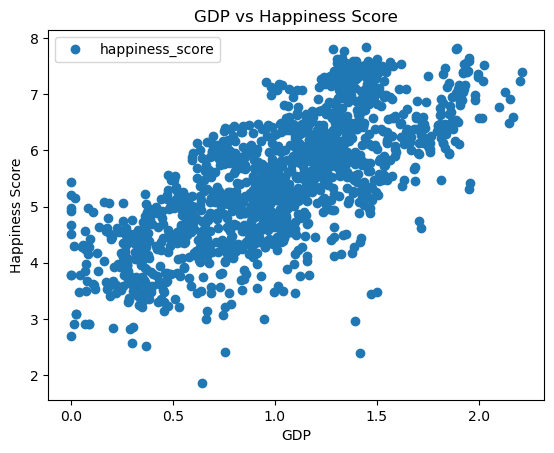

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_merged.plot(x = 'gdp_per_capita', y='happiness_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP vs Happiness Score')  
plt.xlabel('GDP')  
plt.ylabel('Happiness Score')  
plt.show()

### Hypothesis: If a country has higer GDP per Capita, it will have a higher Happiness Score 

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_merged['gdp_per_capita'].values.reshape(-1,1)
y = df_merged['happiness_score'].values.reshape(-1,1)

In [28]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.67   ],
       [1.417  ],
       [0.645  ]])

In [29]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis 

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

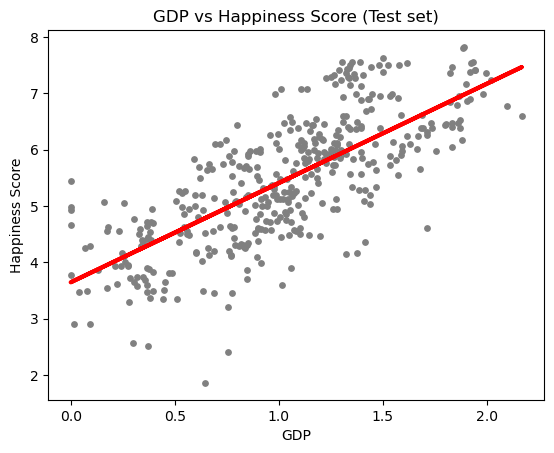

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP vs Happiness Score (Test set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

### Most of the data points are clustered around the regression line, which suggest a strong positive correlation, but very few points actually stays on the regression line

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [45]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.6012168201588419
R2 score:  0.5081864239582867


### With a MSE of 0.60, it tells us that our data points are moderately close to the regression line
### With a R Squared Value of 0.50, it tells that our model explains 50% of the variance in the data
### Considering both the MSE and R Squared Value, it is evident that our model may not be the best in representing this dataset and will not be able to predict the Happiness Score based on the GDP

In [39]:
y_predicted

array([[5.86304424],
       [4.29587408],
       [5.14637204],
       [5.51379421],
       [5.51129378],
       [5.28701236],
       [6.25154928],
       [5.01254628],
       [3.87802073],
       [6.62902066],
       [3.77817967],
       [6.87378095],
       [6.08139154],
       [4.20751386],
       [4.12875035],
       [4.28703454],
       [4.3443507 ],
       [5.89778611],
       [4.94804578],
       [5.4228279 ],
       [5.21017262],
       [3.71667631],
       [6.85441143],
       [5.01606801],
       [5.49678425],
       [4.0916137 ],
       [5.22559482],
       [6.5814773 ],
       [5.52298592],
       [5.94959077],
       [5.84719645],
       [4.70398121],
       [7.069237  ],
       [5.66582732],
       [5.49502338],
       [6.00039174],
       [5.03288   ],
       [5.473893  ],
       [5.88769635],
       [4.56470539],
       [5.63073348],
       [4.29342694],
       [5.84793601],
       [6.03821512],
       [6.29259789],
       [4.98789416],
       [5.73094412],
       [6.104

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
# Adding a new column with Percentage Difference between Actual and Predicted
data['Percentage Difference'] = abs((data['Actual'] - data['Predicted']) / data['Actual']) * 100

data.head(30)

,Actual,Predicted,Percentage Difference
0,4.9480,5.863044,18.493214
1,2.5230,4.295874,70.268493
2,4.3400,5.146372,18.580001
3,6.4850,5.513794,14.976188
4,3.8960,5.511294,41.460313
5,4.5740,5.287012,15.588377
6,7.5040,6.251549,16.690443
7,4.6030,5.012546,8.897377
8,3.8560,3.878021,0.571077
9,6.3770,6.629021,3.952025


In [47]:
percentage_difference_mean = data['Percentage Difference'].mean()
percentage_difference_max = data['Percentage Difference'].max()
percentage_difference_median = data['Percentage Difference'].median()

print('percentage_difference_mean =', percentage_difference_mean,'\n'
      'percentage_difference_max =', percentage_difference_max,'\n'
      'percentage_difference_median =', percentage_difference_median)

percentage_difference_mean = 12.168087417150424 
percentage_difference_max = 157.13351536530382 
percentage_difference_median = 9.691472457599886


### As we can see, the max difference is around 157% which might be because of the outliers. But the mean difference of 12% is also a lot and further tells us that this regression model does not represent the dataset and will not be able to predict the Happiness Score solely based on the GDP of a country.
### Other factors might play a crucial rule in determining the Happiness Score such as Region, Social Support and High Life Expectancy

## Compare how the regression fits the training set 

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.6012168201588419
R2 score:  0.5081864239582867


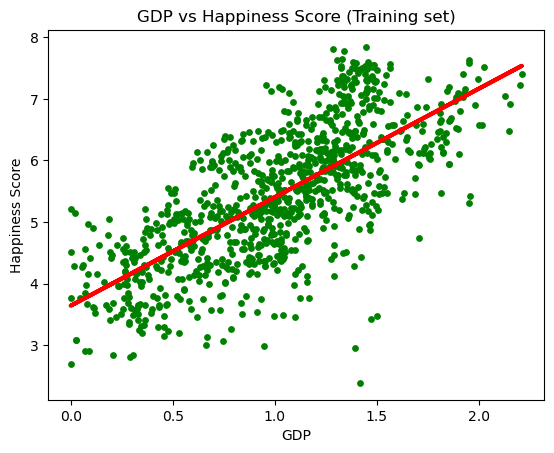

In [49]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP vs Happiness Score (Training set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

### Even with the training set, the MSE and the R Squared Value remains almost same and does not change our decision on the reliability of the model. 